In [1]:
import networkx
from network import *
from node import *

Getting data for network performance

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(12,12))
# plt.xlim(right = 100000)
# plt.style.use('seaborn')

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [ ]:
data_path = "results/performance/multi-hop/result16-performance.npy"
data1 = np.load(data_path, allow_pickle=True).item()
data_path = "results/performance/multi-hop/network1-performance.npy"
data2 = np.load(data_path, allow_pickle=True).item()
data_path = "results/performance/multi-hop/result93-performance.npy"
data3 = np.load(data_path, allow_pickle=True).item()
data3.keys()
path = "results/performance/multi-hop/"

In [ ]:
def func(data1):
	p = 0
	p_list = []
	df = data1
	s_trans = [i[1] for i in df['throughput']]
	for i in s_trans:
		p_list.append(i - p)
		p = i
	s_trans = [i[2] for i in df['throughput']]
	t = []
	# data2['throughput'] = []
	for i in range(len(s_trans)):
		thr = p_list[i]/s_trans[i]
		round(thr, 2)
		t.append(thr)
		# data2['throughput'].append(thr)
		
	data1['t'] = t

func(data1)
func(data2)
func(data3)

In [ ]:
plt.plot(data1['t'],"-.", label = 'server', lw = 1)
plt.plot(data2['t'], label = 'default', lw = 1)
plt.plot(data3['t'], "-.", label = 'serverless', lw = 1)
plt.legend()
plt.show()

In [ ]:
def get_plot(prop, label):
	d = {
		"default" : list(data2[prop]),
		"serverless" : list(data1[prop]),
		"server" : list(data3[prop]),
	}

	maxl = 0
	for key in d:
		maxl = max(maxl, len(d[key]))
		if key == "throughput":
			d[key] = [round(i[1]/i[2], 2) for i in d[key]]
		
	
	lifetime = [i for i in range(1, maxl + 1)]
	plt.figure(figsize=(18, 18))
	print("key", d[key])
	# print(maxl)
	pat = ['-.', '-', '-']
	for key in d:
		d[key] += [0] * (maxl - len(d[key]))
		plt.plot(lifetime, d[key], pat.pop(), label = key, lw = 1)
	plt.xlabel("lifetime")
	plt.ylabel(label)
	plt.legend()
	
	
	#for energy: 
	# plt.xlim(200, 2100)
	# plt.ylim(0, 0.6)
	plt.plot()
	# plt.savefig(path + "throughput-t" + ".svg")
	plt.show()

In [ ]:
data_path = "results/performance/direct/res-network1-performance.npy"
data2 = np.load(data_path, allow_pickle=True).item()  #data2 default
data_path = "results/performance/direct/res-server-performance.npy"
data1 = np.load(data_path, allow_pickle=True).item() #data1 server
data_path = "results/performance/direct/res-serverless-performance.npy"
data3 = np.load(data_path, allow_pickle=True).item() #data3 serverless
data3.keys()

path = "results/performance/direct/"

In [ ]:
get_plot("t", "")

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
markers = ['>', '+', '.', ',', 'o', 'v', 'x', 'X', 'D', '|', 'bs', 'g^', '*', '^', 'd', 'H', 'h']

    no    acc    apl  small_worldness
0    0  0.505  3.414           0.1479
1    1  0.498  3.401           0.1464
2    2  0.503  3.408           0.1476
3    3  0.503  3.398           0.1480
4    4  0.498  3.385           0.1471
5    5  0.497  3.402           0.1461
6    6  0.498  3.415           0.1458
7    7  0.507  3.426           0.1480
8    8  0.501  3.401           0.1473
9    9  0.501  3.397           0.1475
10  10  0.507  3.379           0.1500
11  11  0.502  3.407           0.1473
12  12  0.500  3.398           0.1471
13  13  0.499  3.404           0.1466
14  14  0.500  3.403           0.1469
15  15  0.503  3.390           0.1484
16  16  0.503  3.431           0.1466
17  17  0.499  3.416           0.1461
18  18  0.495  3.415           0.1449
19  19  0.497  3.440           0.1445


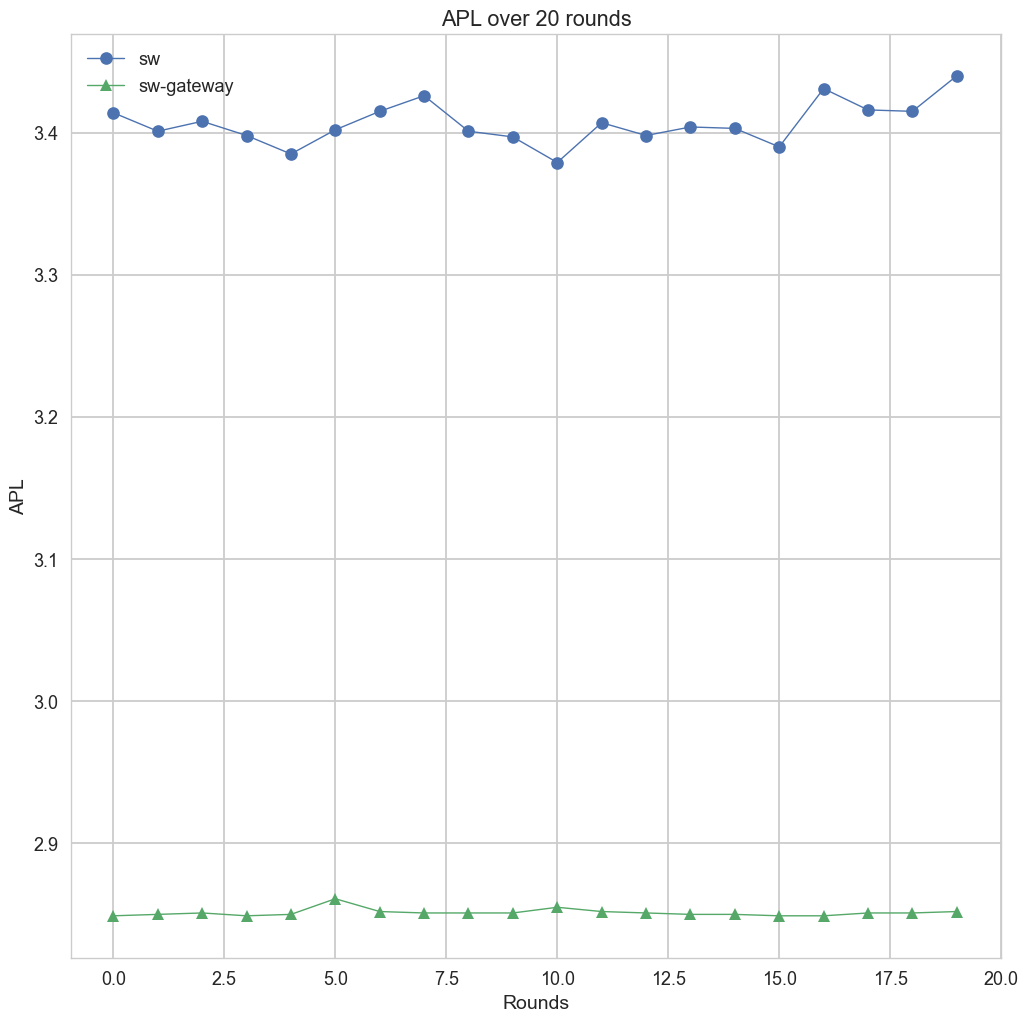

In [29]:
plt.style.use('seaborn-v0_8-talk')
path = "results/result16/history.txt"
path2 = "results/result93/history.txt"
df = pd.read_csv(path)
df2 = pd.read_csv(path2) 
print(df)
plt.figure(figsize=(12,12))
plt.plot(df['no'], df['apl'], marker ='o',label = 'sw', lw = 1)
plt.plot(df['no'], df2['apl'],marker = '^' ,label = 'sw-gateway', lw = 1)
plt.legend()
# plt.ylim(0.1, 0.25)
plt.xlim(right=20)
plt.title("APL over 20 rounds")
plt.ylabel("APL",size = 14)
plt.xlabel("Rounds", size = 14)
# plt.plot(df['apl'], label = 'apl')
plt.savefig("./z-res/1APL over 20 rounds.eps")
plt.savefig("./z-res/1APL over 20 rounds.png")

plt.show()

<Figure size 1040x715 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(df['no'], df['apl'], label = 'apl', lw = 1)
plt.plot(df['no'], df2['apl'], label = 'apl-gateway', lw = 1)
plt.title('APL')
plt.legend()
plt.ylim(1, 4)
plt.show()

In [ ]:
plt.plot(df['no'],df['small_worldness'], label = 'sw', lw = 1)
plt.plot(df['no'], df2['small_worldness'], label = 'sw-gateway', lw = 1)
plt.ylim(0, 0.24)
plt.legend()
plt.show()

In [ ]:
path = "results/result93/history3.txt"
df = pd.read_csv(path)
plt.plot(df['apl'])
plt.show()

In [ ]:
path = "results/result16/history9.txt"
df = pd.read_csv(path)
plt.plot(df['apl'])
plt.show()

In [ ]:
import networkx as nx
from network import *
path = "results/network_data/network1network_data.npy"
net = network(500, 500, 400, 0, 0)

In [ ]:
def load_network(graph_data_path, save_mode):
	"""
	save_mode: 0 -> old network data
	save_mode: 1 -> new network data
	"""
	if(save_mode == 0):
		net.initialise_nodes_fixed(1, 0)
		net.set_parameters(2000, 8, 2000, 3*1e8, 50)
		#load graph

		graph_data = np.load(graph_data_path, allow_pickle=True).item()
	else:
		_, _, graph_data = net.load_network_topology(graph_data_path)

	for Node in net.node_list:
		Node.critical_energy = 0.0

	G = net.set_nxg_from_npy(graph_data)
	# net.show_graph() 
	return G, graph_data

In [ ]:
G, graph_data = load_network(path, 1)
G.remove_node(0)
net.show_graph()

In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
model = node2vec.fit(window=10, min_count=1)
model.wv.save_word2vec_format("embedding.emb") #save the embedding in file embedding.emb

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
X = np.loadtxt("embedding.emb", skiprows=1)
X=X[X[:,0].argsort()]
Z=X[0:X.shape[0],1:X.shape[1]]

In [ ]:
kmeans = KMeans(n_clusters=100, n_init= 'auto',random_state=0, algorithm="lloyd").fit(Z)
labels=kmeans.labels_  # get the cluster labels of the nodes.

In [ ]:
label_data = {
    "data": list(labels)
}
np.save("./leach-cluster-label.npy", label_data)

In [ ]:
cnt =0
for x in labels:
    if x == 0:
        cnt += 1

print(cnt)

In [ ]:
net.show_cluster("./leach-cluster-label.npy", 100)

In [ ]:
maxi = 0
for k in range(100):
	cnt = 0
	for i in range(len(labels)):
		if i == k:
			cnt += 1
	maxi = max(maxi, cnt)
	print(k, cnt)
print(maxi)

(201, 4) (285, 4)
(200, 3) (200, 3)


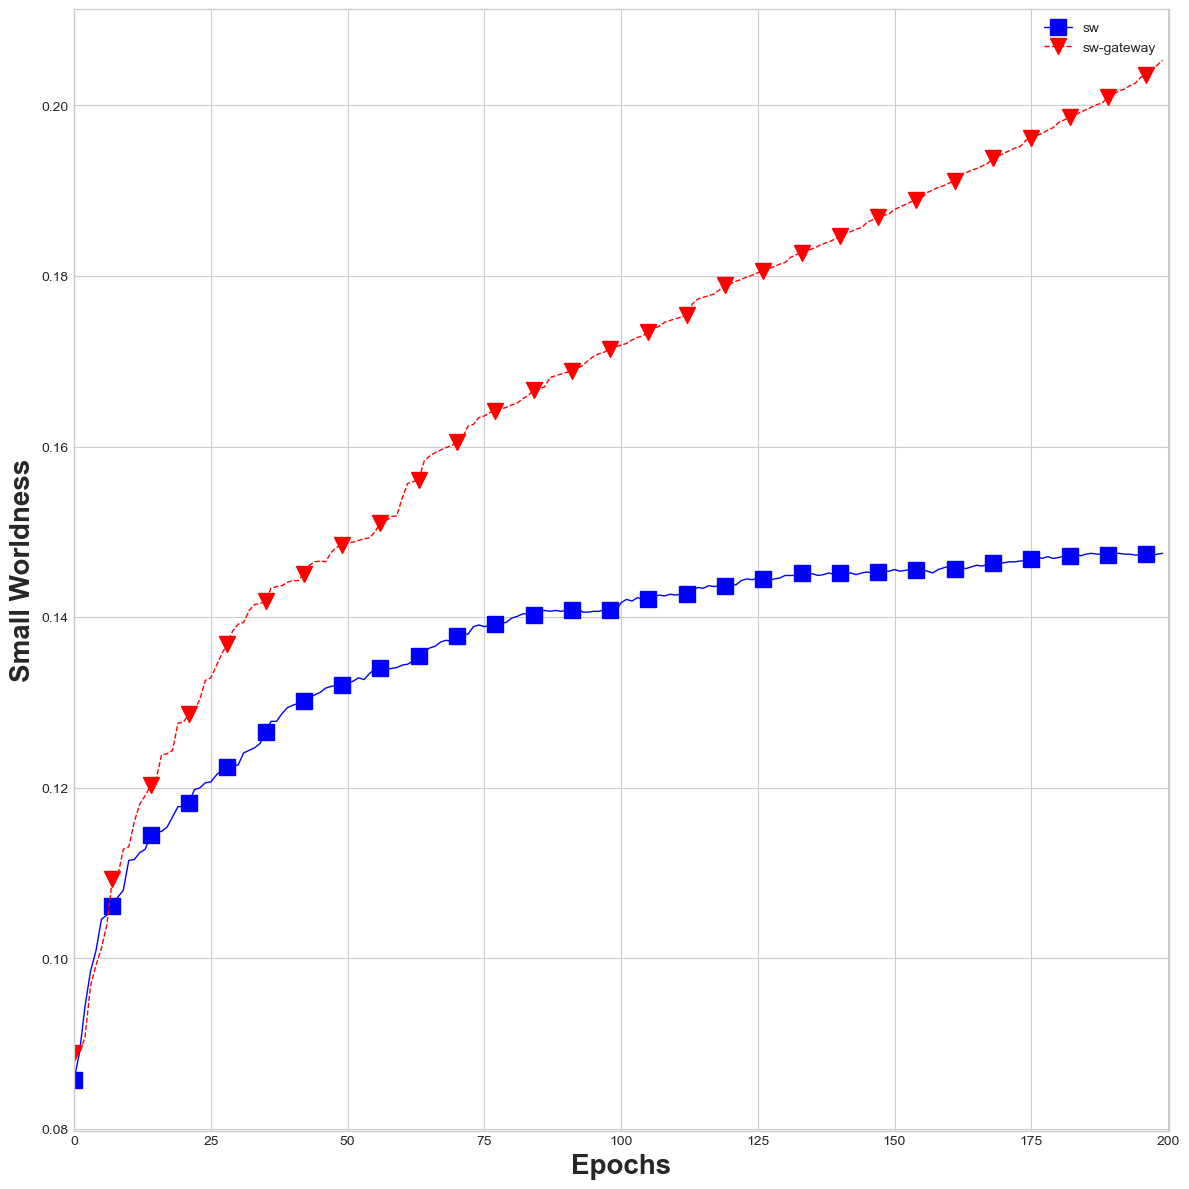

In [32]:
plt.style.use('seaborn-v0_8-whitegrid')
path = "results/result16/history9.txt"
df = pd.read_csv(path)
path = "results/result93/history3.txt"
df2 = pd.read_csv(path)
print(df.shape, df2.shape)
df = df.drop('no.', axis=1)
df2 = df2.drop('no.', axis=1)
df = df.drop(0)
df2 = df2.drop(0)
df = df.drop_duplicates(keep='last')
df2 = df2.drop_duplicates(keep='last')
df = df.reset_index()
df2 = df2.reset_index()
df = df.drop('index', axis=1)
df2 = df2.drop('index', axis=1)


print(df.shape, df2.shape)
plt.figure(figsize=(12,12))
plt.plot(df.index, df['small_worldness'], marker= 's',ms= 12, markevery = 7, lw = 1, linestyle = 'solid', color = 'blue' ,label = "sw")
plt.plot(df2.index, df2['small_worldness'], marker = 'v', ms=12,markevery = 7,lw = 1,linestyle = 'dashed', color = 'red' ,label = "sw-gateway")
plt.legend()
plt.ylabel("Small Worldness", weight = 'bold', size = 20)
plt.xlabel("Epochs", weight = 'bold', size = 20)
# plt.title("best iteration Average Clustering Coefficient")
plt.savefig('./z-res/eps/2best iteration Small Worldness.eps')
plt.savefig('./z-res/2best iteration Small Worldness.png')
plt.xlim(-0.1, 200.1)
plt.tight_layout(pad=1.09)
plt.show()

In [84]:
df2.sample(20)

,acc,apl,small_worldness
27,0.584,4.304,0.1357
65,0.578,3.637,0.1589
171,0.580,2.979,0.1947
166,0.579,3.001,0.1929
177,0.581,2.953,0.1967
133,0.577,3.158,0.1827
85,0.577,3.460,0.1668
81,0.576,3.488,0.1651
136,0.577,3.145,0.1835
10,0.588,5.201,0.1131


In [100]:
import random

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(df.index, df['acc'], lw = 1, label = "acc")
plt.plot(df2.index, df2['acc'], lw = 1, label = "acc-gateway")
plt.legend()
# plt.ylim(0.49, 0.7)
plt.title("best iteration acc")
plt.show()

In [ ]:
import numpy as np
data = './results/performance/leach/cluster-leach.npy-performance.npy'
dt = np.load(data, allow_pickle=True).item() 

In [ ]:
path = "results/network_data/network1network_data.npy"
# path = "results/result16/9-graph_data.npy"
# path = "results/result93/3-graph_data.npy"

In [52]:
import random

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/var/folders/kx/5bcr7xtd3cx013wx021j2kc40000gn/T/ipykernel_14384/125693560.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


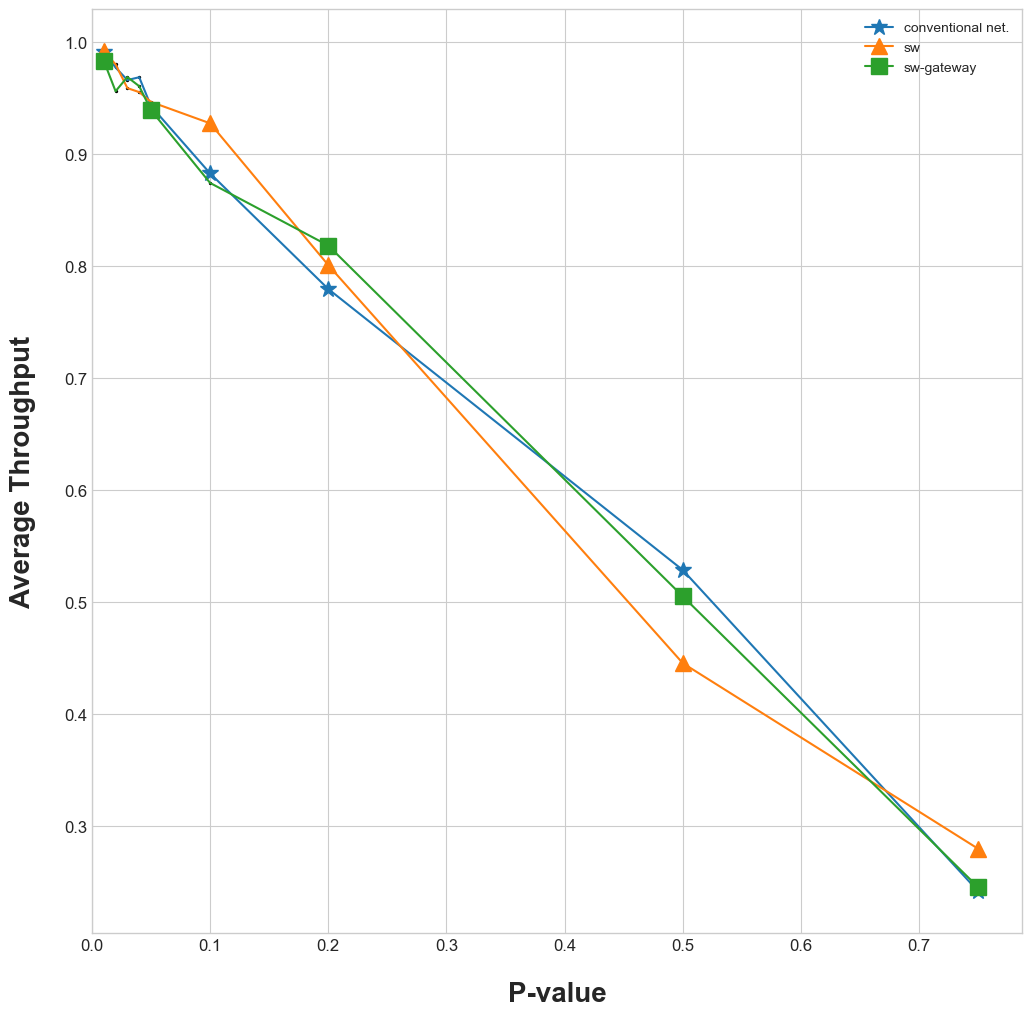

In [51]:
P = [0.1, 0.01, 0.2, 0.02, 0.03, 0.04, 0.5, 0.05, 0.75]
P.sort()
ld = ["conventional net.", "sw", "sw-gateway"]
colors = ["teal", 'crimson', "mediumseagreen", "indianred", "purple", "navy", "lightskyblue", "khaki", "darkorange", "darkslategray"]
patterns = ["dashed", "dotted", "dashdot", "solid", (0,(5,10)), (0,(5,1))]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,12))
mk = ['*', '^', 's']
for i in range(3):
	y = []
	x = []
	# plt.xscale('log')
	for p in P:
		file =  "results/performance/leach/P-" + str(p) + "/" + str(i) + "-performance.npy"
		bdt = np.load(file, allow_pickle=True).item()
		db = pd.DataFrame(bdt)
		avg_en = db['throughput']
		thr = []
		for row in avg_en:
			thr.append(row[2])
		thr = pd.DataFrame(thr)
		avg_en = thr.mean()
		# avg_en = avg_en.mean()
		y.append(avg_en)
		x.append(p)
		plt.scatter(p, avg_en, marker= 'o', s = 2, color = 'black')
		# plt.plot(thr, label = ld[i] + ": " + str(p), color = colors[random.randint(0,len(colors)-1)],linestyle=patterns[random.randint(0,len(patterns)-1)])
	plt.plot(x,y, label = ld[i], marker= mk[i], ms = 12, markevery = 0.1)
plt.xlim(left = 0)
# plt.ylim(bottom=0)
# plt.title("Average Lifetime vs P-value over different network topologies", size = 22, pad = 16)
plt.xlabel("P-value", size=20, weight = 'bold', labelpad=20)
plt.ylabel("Average Throughput",size= 20, weight = 'bold', labelpad=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig("./z-res/eps/3Averge Throughput vs P-value over different network topologies.eps")
plt.savefig("./z-res/3Averge Throughput vs P-value over different network topologies.png")
plt.legend()
plt.show()

In [120]:
db['throughput'][i][2]

0.247

In [124]:
file =  "results/performance/leach/P-" + str(0.01) + "/" + str(0) + "-performance.npy"
bdt = np.load(file, allow_pickle=True).item()
db = pd.DataFrame(bdt)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'slice'

In [69]:
from node import *
from network import *
import networkx as nx
# net = network(500, 500, 400, 0, 0)
# net.initialise_nodes_fixed(1, 0.4)
# net.set_parameters(2000, 200, 2000, 3*1e8, 50)
# net.set_nxg()

net = network(500, 500, 400, 0, 0)
# path = "results/network_data/network1network_data.npy"
# path = "results/result93/3-graph_data.npy"
path = "results/result16/9-graph_data.npy"

gd = net.load_network(path, 0)
e = 0
for Node in net.node_list:
	Node.critical_energy = 0.0
	e += Node.current_energy
	
net.packet_length = 8
sink = net.sink
dead_node = set()
k = net.packet_length
rnds = 0

er = sink.energy_for_reception(k)
n = net.number_of_nodes
n_map = net.node_map
net.calculate_latency()
lm = net.latency_matrix
dm = net.calculate_dist()
energy_per_round = [e]
latency_per_round = []
throughput_per_round = []
total_latency = 0

In [70]:
while len(dead_node) < 0.9*n:
	message_generated = n - len(dead_node)
	e = 0
	l = 0
	s_trans = 0
	
	for Node in net.node_list:
		if Node not in dead_node:
			path = nx.astar_path(net.nxg, 0, Node.id)
			path.reverse()
			curr = net.node_map[path.pop()]
			if len(path) == 0:
				continue
			while len(path) != 0:
				next = net.node_map[path.pop()]
				l += lm[curr.id][next.id]
				curr.current_energy -= curr.energy_for_transmission(k, next.dist(curr))
				next.current_energy -= er
				curr = next
			
			s_trans += 1
			
	for Node in net.node_list:
		e += max(Node.current_energy, Node.critical_energy)
		if Node.current_energy <= Node.critical_energy:
			dead_node.add(Node)

	latency_per_round.append(l)
	energy_per_round.append(e)
	throughput_per_round.append([message_generated, s_trans, round(s_trans/message_generated, 3)])			

	print("----")
	print(rnds, len(dead_node), e, round(l,3), round(s_trans/message_generated, 3))
	total_latency+= l
	e = 0
	l = 0
	s_trans = 0
	rnds += 1
	print("----")

total_latency+= l

avg_latency= total_latency/rnds
print(rnds)

----
0 0 399.95566695495 18.861 1.0
----
----
1 0 399.9113339098984 18.861 1.0
----
----
2 0 399.86700086484433 18.861 1.0
----
----
3 0 399.82266781979393 18.861 1.0
----
----
4 0 399.77833477474235 18.861 1.0
----
----
5 0 399.7340017296922 18.861 1.0
----
----
6 0 399.6896686846421 18.861 1.0
----
----
7 0 399.64533563959037 18.861 1.0
----
----
8 0 399.6010025945367 18.861 1.0
----
----
9 0 399.5566695494845 18.861 1.0
----
----
10 0 399.51233650443464 18.861 1.0
----
----
11 0 399.4680034593843 18.861 1.0
----
----
12 0 399.4236704143329 18.861 1.0
----
----
13 0 399.3793373692827 18.861 1.0
----
----
14 0 399.3350043242286 18.861 1.0
----
----
15 0 399.2906712791769 18.861 1.0
----
----
16 0 399.2463382341267 18.861 1.0
----
----
17 0 399.2020051890767 18.861 1.0
----
----
18 0 399.1576721440246 18.861 1.0
----
----
19 0 399.11333909897087 18.861 1.0
----
----
20 0 399.06900605392076 18.861 1.0
----
----
21 0 399.02467300886906 18.861 1.0
----
----
22 0 398.98033996381906 18.861 

KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
fp_list = {
		"sw" : "results/performance/sw-bs/result16-17-11-performance.npy",
		"sw-gateway": "results/performance/sw-bsless/result93-performance.npy",
		"conventional" : "results/performance/multi-hop/conventional/0-performance.npy",
        "a-star-conv" : "results/performance/multi-hop/a-star/conv/100-performance.npy",
        "a-star-sw" : "results/performance/multi-hop/a-star/sw/100-performance.npy",
        "direct" : "results/performance/direct/0-performance.npy",
        # "Leach (P = 0.2) Conventional" : "results/performance/leach/P-0.2/0-performance.npy",
        "Leach (P = 0.05) Conventional" : "results/performance/leach/P-" + str(0.05) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.05) Small World" : "results/performance/leach/P-" + str(0.05) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.05) Small World-Gateway" : "results/performance/leach/P-" + str(0.05) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.01) Conventional" : "results/performance/leach/P-" + str(0.01) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.01) Small World" : "results/performance/leach/P-" + str(0.01) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.01) Small World-Gateway" : "results/performance/leach/P-" + str(0.01) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.02) Conventional" : "results/performance/leach/P-" + str(0.02) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.02) Small World" : "results/performance/leach/P-" + str(0.02) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.02) Small World-Gateway" : "results/performance/leach/P-" + str(0.02) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.03) Conventional" : "results/performance/leach/P-" + str(0.03) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.03) Small World" : "results/performance/leach/P-" + str(0.03) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.03) Small World-Gateway" : "results/performance/leach/P-" + str(0.03) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.04) Conventional" : "results/performance/leach/P-" + str(0.04) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.04) Small World" : "results/performance/leach/P-" + str(0.04) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.04) Small World-Gateway" : "results/performance/leach/P-" + str(0.04) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.1) Conventional" : "results/performance/leach/P-" + str(0.1) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.1) Small World" : "results/performance/leach/P-" + str(0.1) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.1) Small World-Gateway" : "results/performance/leach/P-" + str(0.1) + "/" + str(2) + "-performance.npy",

        "Leach (P = 0.2) Small World" : "results/performance/leach/P-" + str(0.2) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.2) Small World- Gateway" : "results/performance/leach/P-" + str(0.2) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.2) Conventional" : "results/performance/leach/P-" + str(0.2) + "/" + str(0) + "-performance.npy",
        # "Leach (P = 0.5) Conventional" : "results/performance/leach/P-" + str(0.5) + "/" + str(0) + "-performance.npy",
        # "Leach (P = 0.5) Conventional" : "results/performance/leach/P-" + str(0.5) + "/" + str(0) + "-performance.npy",
        # "Leach (P = 0.5) Conventional" : "results/performance/leach/P-" + str(0.5) + "/" + str(0) + "-performance.npy",
        # "Leach (P = 0.5) Conventional" : "results/performance/leach/P-" + str(0.5) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.5) Conventional" : "results/performance/leach/P-" + str(0.5) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.5) Small World" : "results/performance/leach/P-" + str(0.5) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.5) Small World - Gateway" : "results/performance/leach/P-" + str(0.5) + "/" + str(2) + "-performance.npy",
        "Leach (P = 0.75) Conventional" : "results/performance/leach/P-" + str(0.75) + "/" + str(0) + "-performance.npy",
        "Leach (P = 0.75) Small World" : "results/performance/leach/P-" + str(0.75) + "/" + str(1) + "-performance.npy",
        "Leach (P = 0.75) Small World - Gateway" : "results/performance/leach/P-" + str(0.75) + "/" + str(2) + "-performance.npy",
}
clr = {
    "a-star-sw" : ["teal", "dashed"],
    "a-star-conv": ["green", "dashed"],
    "direct" : ["hotpink", "solid"],
    "sw" : ["blue","dashdot"],
    "sw-gateway" : ["yellowgreen","dashdot"],
    "conventional" : ['red', '--'],
    # "Leach (P = 0.2) Conventional" : ["olive", (0, (1,1))],
    "Leach (P = 0.75) Conventional" : ["gold", (0, (5,1))],
    "Leach (P = 0.75) Small World" : ["green", "dashdot"],
    "Leach (P = 0.75) Small World - Gateway" : ["sienna","dashed"],
    "Leach (P = 0.5) Conventional" : ["purple", (0, (5,1))],
    "Leach (P = 0.5) Small World" : ["olive", "dashdot"],
    "Leach (P = 0.5) Small World - Gateway" : ["navy","dashed"],
	"Leach (P = 0.05) Small World" : ["dimgray",(0,(5,1))],
	"Leach (P = 0.05) Small World-Gateway" : ["darkorange", "dashed"],
	"Leach (P = 0.05) Conventional" : ["lime","dashdot"],
}

/var/folders/kx/5bcr7xtd3cx013wx021j2kc40000gn/T/ipykernel_14384/3650976875.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


     0    1    2
0  400  400  1.0
1  399  399  1.0
2  399  399  1.0
3  397  397  1.0
4  397  397  1.0
5  397  397  1.0
6  396  396  1.0
7  395  395  1.0
8  395  395  1.0
9  395  395  1.0
     0    1    2
0  400  400  1.0
1  400  400  1.0
2  400  400  1.0
3  400  400  1.0
4  400  400  1.0
5  400  400  1.0
6  400  400  1.0
7  400  400  1.0
8  400  400  1.0
9  400  400  1.0
     0    1    2
0  400  400  1.0
1  400  400  1.0
2  400  400  1.0
3  400  400  1.0
4  400  400  1.0
5  400  400  1.0
6  400  400  1.0
7  400  400  1.0
8  400  400  1.0
9  400  400  1.0
     0    1    2
0  400  400  1.0
1  400  400  1.0
2  400  400  1.0
3  400  400  1.0
4  400  400  1.0
5  400  400  1.0
6  400  400  1.0
7  400  400  1.0
8  400  400  1.0
9  400  400  1.0
     0    1    2
0  400  400  1.0
1  400  400  1.0
2  400  400  1.0
3  400  400  1.0
4  400  400  1.0
5  400  400  1.0
6  400  400  1.0
7  400  400  1.0
8  400  400  1.0
9  400  400  1.0


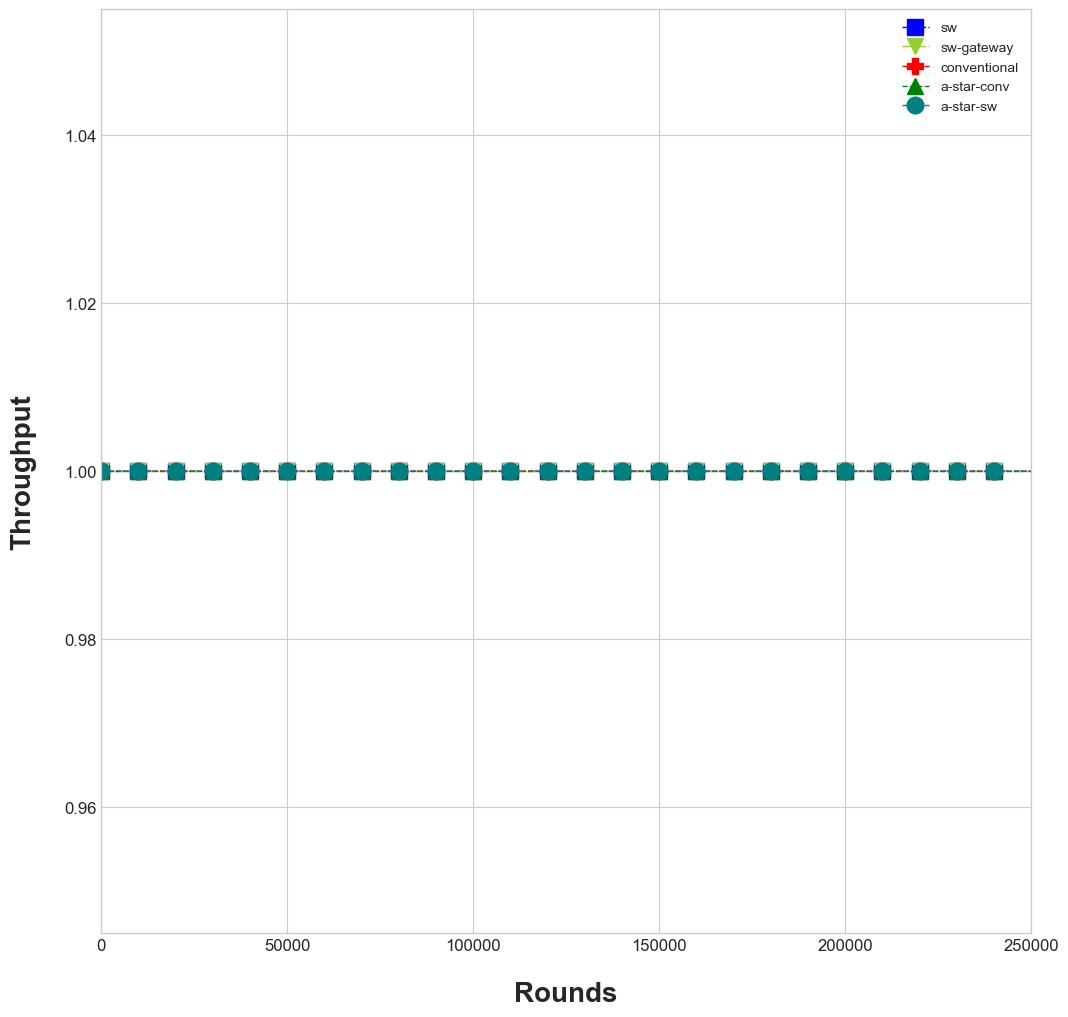

In [73]:
plt.figure(figsize=(12,12))
# plt.xlim(right = 100000)
plt.style.use('seaborn-whitegrid')
markers = ['s', 'v', 'P', '^', 'o']
m_ptr = 0
for key in fp_list:
	if key == 'direct':
		# db = np.load(fp_list[key], allow_pickle=True).item()
		# db = pd.DataFrame(db['latency'])
		# # db = db[3]
		# try:
		# 	color = clr[key]
		# 	plt.plot(db, label = key,color= color[0], linestyle = color[1], linewidth = 1.9, marker = '+', ms = 8, markevery = 75)
		# except KeyError:
		# 	plt.plot(db, label = key)
		continue
	if key == "a-star-conv" or key == "a-star-sw" or key == "sw" or key == "sw-gateway" or key == "conventional":
		# continue
		db = np.load(fp_list[key], allow_pickle=True).item()
		db = pd.DataFrame(db['throughput'])
		print(db.head(10))
		db = db[2]
		try:
			color = clr[key]
			plt.plot(db, label = key,color= color[0], linestyle = color[1], lw = 1, marker = markers[m_ptr], ms = 12, markevery = 10000)
			m_ptr += 1
		except KeyError:
			plt.plot(db, label = key)
	else:
		continue
		
	
		
		
plt.legend()
# plt.ylim((0, 2))
plt.xlim((-0.1, 250001))
plt.ylabel("Throughput",size=20, weight = 'bold', labelpad=20)
plt.xlabel("Rounds", size=20, weight = 'bold', labelpad=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig("./z-res/eps/4Throughput in various multi hop protocol.eps")
plt.savefig("./z-res/4Throughput in various multi hop protocol.png")

In [ ]:
db = np.load(fp_list["sw"], allow_pickle=True).item()
db = pd.DataFrame(db['throughput'])
db.head()
thr = db[2]

In [112]:
db = np.load("results/performance/direct/0-performance.npy", allow_pickle= True).item()
db = pd.DataFrame(db['energy'])
db.head()

,0
0,391.971569
1,383.943137
2,375.914706
3,367.886274
4,359.857843


In [1]:
import os
path = "./results"
os.listdir(path)

['new_dijk.png', 'result50', 'network_data', 'result39', 'dijk-ppo-server.png']

In [4]:
import torch


In [6]:
torch.cuda.mem_get_info()

(2622160896, 6226378752)

In [3]:
from ./rl-ppo-1/ import env.py

SyntaxError: invalid syntax (1473762105.py, line 1)

In [10]:
import numpy as np
p = "./results/ppo/result/multihop/0-performance.npy"
db = np.load(p, allow_pickle=True).item()
db['energy']

[400,
 395.1652998149569,
 393.3305996299117,
 391.7208619024474,
 390.5346621380266,
 389.41834880682006,
 388.3643167966981,
 387.5745546144805,
 386.79949943869525,
 386.0481136981538,
 385.38681435948615,
 384.7255150208204,
 384.0642156821547,
 383.47267784041503,
 382.8936978475728,
 382.385785965841,
 381.885980231083,
 381.3861744963271,
 380.88636876157096,
 380.3865630268129,
 379.88675729205227,
 379.3869515572961,
 378.887145822538,
 378.3873400877823,
 377.89786806582026,
 377.4401675717038,
 376.98246707758346,
 376.5247665834643,
 376.0863476176594,
 375.6650648240252,
 375.24378203038896,
 374.8224992367502,
 374.40121644311597,
 373.9799336494798,
 373.5586508558457,
 373.1373680622116,
 372.7160852685751,
 372.29480247493643,
 371.8953110245408,
 371.50095653432714,
 371.10660204411374,
 370.71224755389744,
 370.31789306368336,
 369.9235385734648,
 369.52918408324894,
 369.13482959303485,
 368.7747139785116,
 368.443658778339,
 368.1254583673037,
 367.85789074903965,
